## Graph Neural Networks (GNN)

### Introduction

Graph Neural Networks (GNNs) are a class of neural networks designed to perform inference on data structured as graphs. Graphs consist of nodes (vertices) and edges (connections between nodes), which makes them suitable for representing complex relationships and interdependencies in data. GNNs leverage the graph structure to learn node representations, edge features, and even entire graph properties.

**References:**

1. https://distill.pub/2021/gnn-intro/
2. https://distill.pub/2021/understanding-gnns/
3. [Graph Laplacian Tutorial](https://csustan.csustan.edu/~tom/Clustering/GraphLaplacian-tutorial.pdf) - by Radu  P. Horaud
4. [Hands-on Graph Neural Networks using Python](https://www.packtpub.com/product/hands-on-graph-neural-networks-using-python/9781804617526)- by Maxime Labonne


**Main Concepts**

 1. **Graph Structures**

  - **Nodes:** Entities or data points in the graph.

  - **Edges:** Connections or relationships between the nodes.

  - **Adjacency Matrix:** A matrix representation of a graph where each element indicates whether pairs of nodes are adjacent or not.

2. **Node Features:** Attributes or features associated with each node.

3. **Edge Features:** Attributes or features associated with each edge.


**Anatomy of GNNs**

 1. **Initialization:** Node and edge features are initialized.

 2. **Propagation:** Information is propagated through the graph via message passing and aggregation.

 3. **Learning:** Node representations are updated iteratively to capture the local and global structure of the graph.

 4. **Readout:** The final node embeddings can be used for various tasks such as node classification, link prediction, and graph classification.

### Example - Karate Club Data (1977)

The data represents the social interactions in a university karate club, famously studied by Wayne W. Zachary in 1977. This dataset is often used for tasks such as node classification, community detection, and graph visualization.

Detailed Description of the Karate Club Dataset
Graph Structure:

- **Nodes:** The dataset contains 34 nodes, each representing a member of the karate club.

- **Edges:** There are 78 edges, representing the interactions between these members. An edge between two nodes indicates that the corresponding members had social interactions outside the club meetings.
Features:

The nodes have no intrinsic features. However, when using the dataset in machine learning tasks, it is common to use an identity matrix as the feature matrix, where each node is represented by a one-hot encoded vector.

- **Labels:** Each node is labeled with one of two classes, indicating which faction the member belongs to after a split in the club. The split occurred due to a conflict between the club's administrator (node 0) and the instructor (node 33). These labels can be used for binary node classification tasks.

- **Metadata:**

    - Number of Nodes: 34
    - Number of Edges: 78 (undirected)
    - Number of Classes: 2 or 4 (if the data version is augmented with factions)
    - Edge List: A list of node pairs representing the edges in the graph.
    - Node Labels: A list indicating the class of each node.

<figure>
<center>
<img src='https://i.imgur.com/xnJKU3W.gif'
width='600px' />
<figcaption>GNN in Training</figcaption></center>
</figure>

Graph Convolutional Networks (GCNs) generalize the concept of convolution from regular grids (like images) to graph-structured data.

### 1. Graph Representation

A graph $ G $ is represented by:
- **Nodes (vertices)**: $ V $
- **Edges**: $ E $
- **Adjacency Matrix**: $ A $
- **Feature Matrix**: $ X $, where $ X \in \mathbb{R}^{N \times F} $ (N is the number of nodes, and F is the number of features per node)

### 2. The Convolution Operation in GCNs

#### 2.1. Graph Laplacian

The normalized graph Laplacian is a key component in GCNs. It's defined as:
$$ L = I - D^{-1/2} A D^{-1/2} $$
where $ D $ is the degree matrix, and $ A $ is the adjacency matrix. The identity matrix $ I $ ensures self-loops are considered.

#### 2.2. Spectral Convolutions

The spectral convolution on graphs is defined using the eigen decomposition of the graph Laplacian:
$$ L = U \Lambda U^T $$
where $ U $ is the matrix of eigenvectors, and $ \Lambda $ is the diagonal matrix of eigenvalues.

The convolution operation in the spectral domain is:
$$ g_\theta * x = U g_\theta(\Lambda) U^T x $$
where $ g_\theta(\Lambda) $ is a function of the eigenvalues.

#### 2.3. Chebyshev Polynomials Approximation

To avoid the expensive eigen decomposition, GCNs use Chebyshev polynomials to approximate the convolution:
$$ g_\theta * x \approx \sum_{k=0}^{K} \theta_k T_k(\tilde{L}) x $$
where $ T_k $ is the Chebyshev polynomial of order $ k $ and $ \tilde{L} = 2L/\lambda_{max} - I $. Chebyshev polynomials of the first kind $ T_k(x) $ can be recursively defined as: $$T_0(x) = 1$$

$$T_1(x) = x$$

$$T_{k+1}(x) = 2x T_k(x) - T_{k-1}(x).$$


For simplicity, this can be further simplified to a first-order approximation (K = 1):
$$ g_\theta * x \approx \theta_0 x + \theta_1 (D^{-1/2} A D^{-1/2}) x $$

#### 2.4. Simplified GCN Layer

Kipf and Welling (2016) proposed a simplified version of the graph convolution layer:
$$ H^{(l+1)} = \sigma(\tilde{A} H^{(l)} W^{(l)}) $$
where:
- $ \tilde{A} = D^{-1/2} \hat{A} D^{-1/2} $ (normalized adjacency matrix with self-loops)
- $ \hat{A} = A + I $ (adjacency matrix with added self-loops)
- $ H^{(l)} $ is the input feature matrix at layer $ l $
- $ W^{(l)} $ is the trainable weight matrix at layer $ l $
- $ \sigma $ is an activation function, like ReLU.

### 3. Forward Pass of a GCN Layer

During the forward pass of a GCN layer, the following steps occur:

1. **Aggregate Neighbor Information**:
   Multiply the input feature matrix $ H^{(l)} $ with the normalized adjacency matrix $ \tilde{A} $ to aggregate information from neighboring nodes.
   $$ \tilde{A} H^{(l)} $$

2. **Linear Transformation**:
   Apply a linear transformation using the weight matrix $ W^{(l)} $.
   $$ \tilde{A} H^{(l)} W^{(l)} $$

3. **Activation Function**:
   Apply a non-linear activation function (e.g., ReLU) to introduce non-linearity.
   $$ H^{(l+1)} = \sigma(\tilde{A} H^{(l)} W^{(l)}) $$


#### Takeaways

- **Graph Laplacian**: Used to capture the structure of the graph.
- **Chebyshev Polynomials**: Approximate the convolution operation to avoid eigen decomposition.
- **Simplified GCN Layer**: Uses a normalized adjacency matrix to aggregate neighbor information and apply transformations.

This process allows GCNs to learn meaningful node representations by capturing both the local neighborhood structure and the node features. For more in-depth reading, you can refer to the original paper by Kipf and Welling (2016) titled ["Semi-Supervised Classification with Graph Convolutional Networks"](https://arxiv.org/abs/1609.02907).


**Applications**

 - Social Networks: GNNs can model relationships and interactions between users.

 - Molecular Chemistry: GNNs can predict molecular properties and interactions.

 - Recommendation Systems: GNNs can enhance recommendations by modeling user-item interactions.

 - Traffic Networks: GNNs can predict traffic patterns by modeling road networks.

 - Natural Language Processing (NLP): GNNs can be used for tasks like semantic role labeling and machine translation by modeling linguistic structures.



### Code Applications

---

In [ ]:
!pip install -q torch_geometric

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import KarateClub, Planetoid
from torch_geometric.nn import ChebConv
from torch_geometric.utils import to_dense_adj
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx
import graphviz
import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import os
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.3.0+cu121


#### How to visualize a graph structure

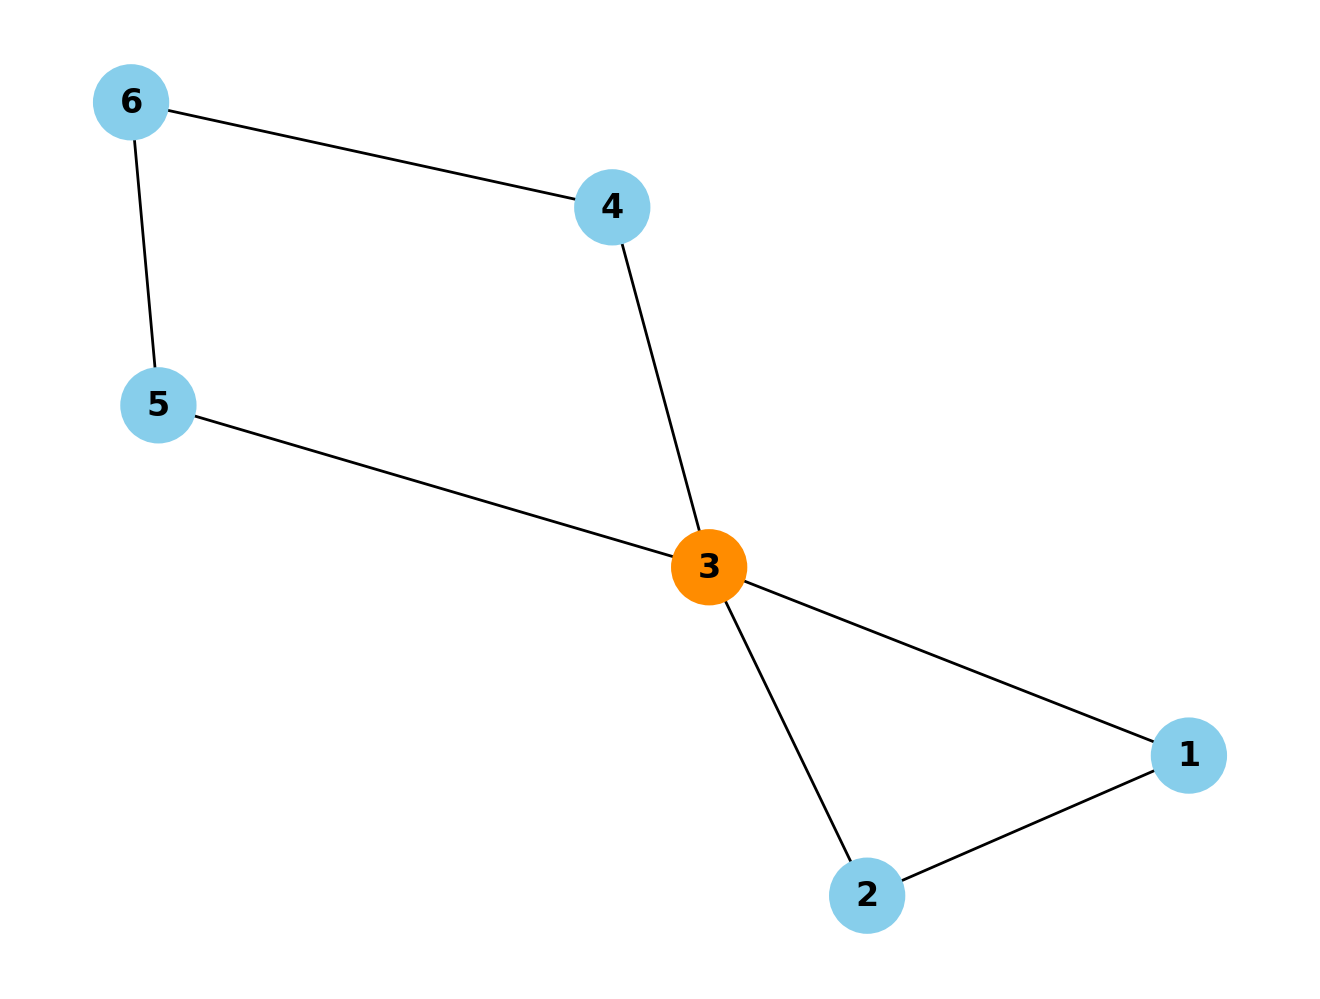

In [ ]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(6, 4)
G.add_edge(5, 3)
G.add_edge(5, 6)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes

# Define node colors
node_colors = ['skyblue' if node != 3 else 'darkorange' for node in G.nodes()]

# Draw the graph with node colors
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_weight='bold')

# Display the graph
plt.show()

#### Example Application with the Karate Club Data

In [ ]:
# Import dataset from PyTorch Geometric
dataset = KarateClub()
# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [ ]:
# Print first element
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [ ]:
data = dataset[0]

In [ ]:
data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [ ]:
data.edge_index[:,4]

tensor([0, 5])

In [ ]:
A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [ ]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [ ]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [ ]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


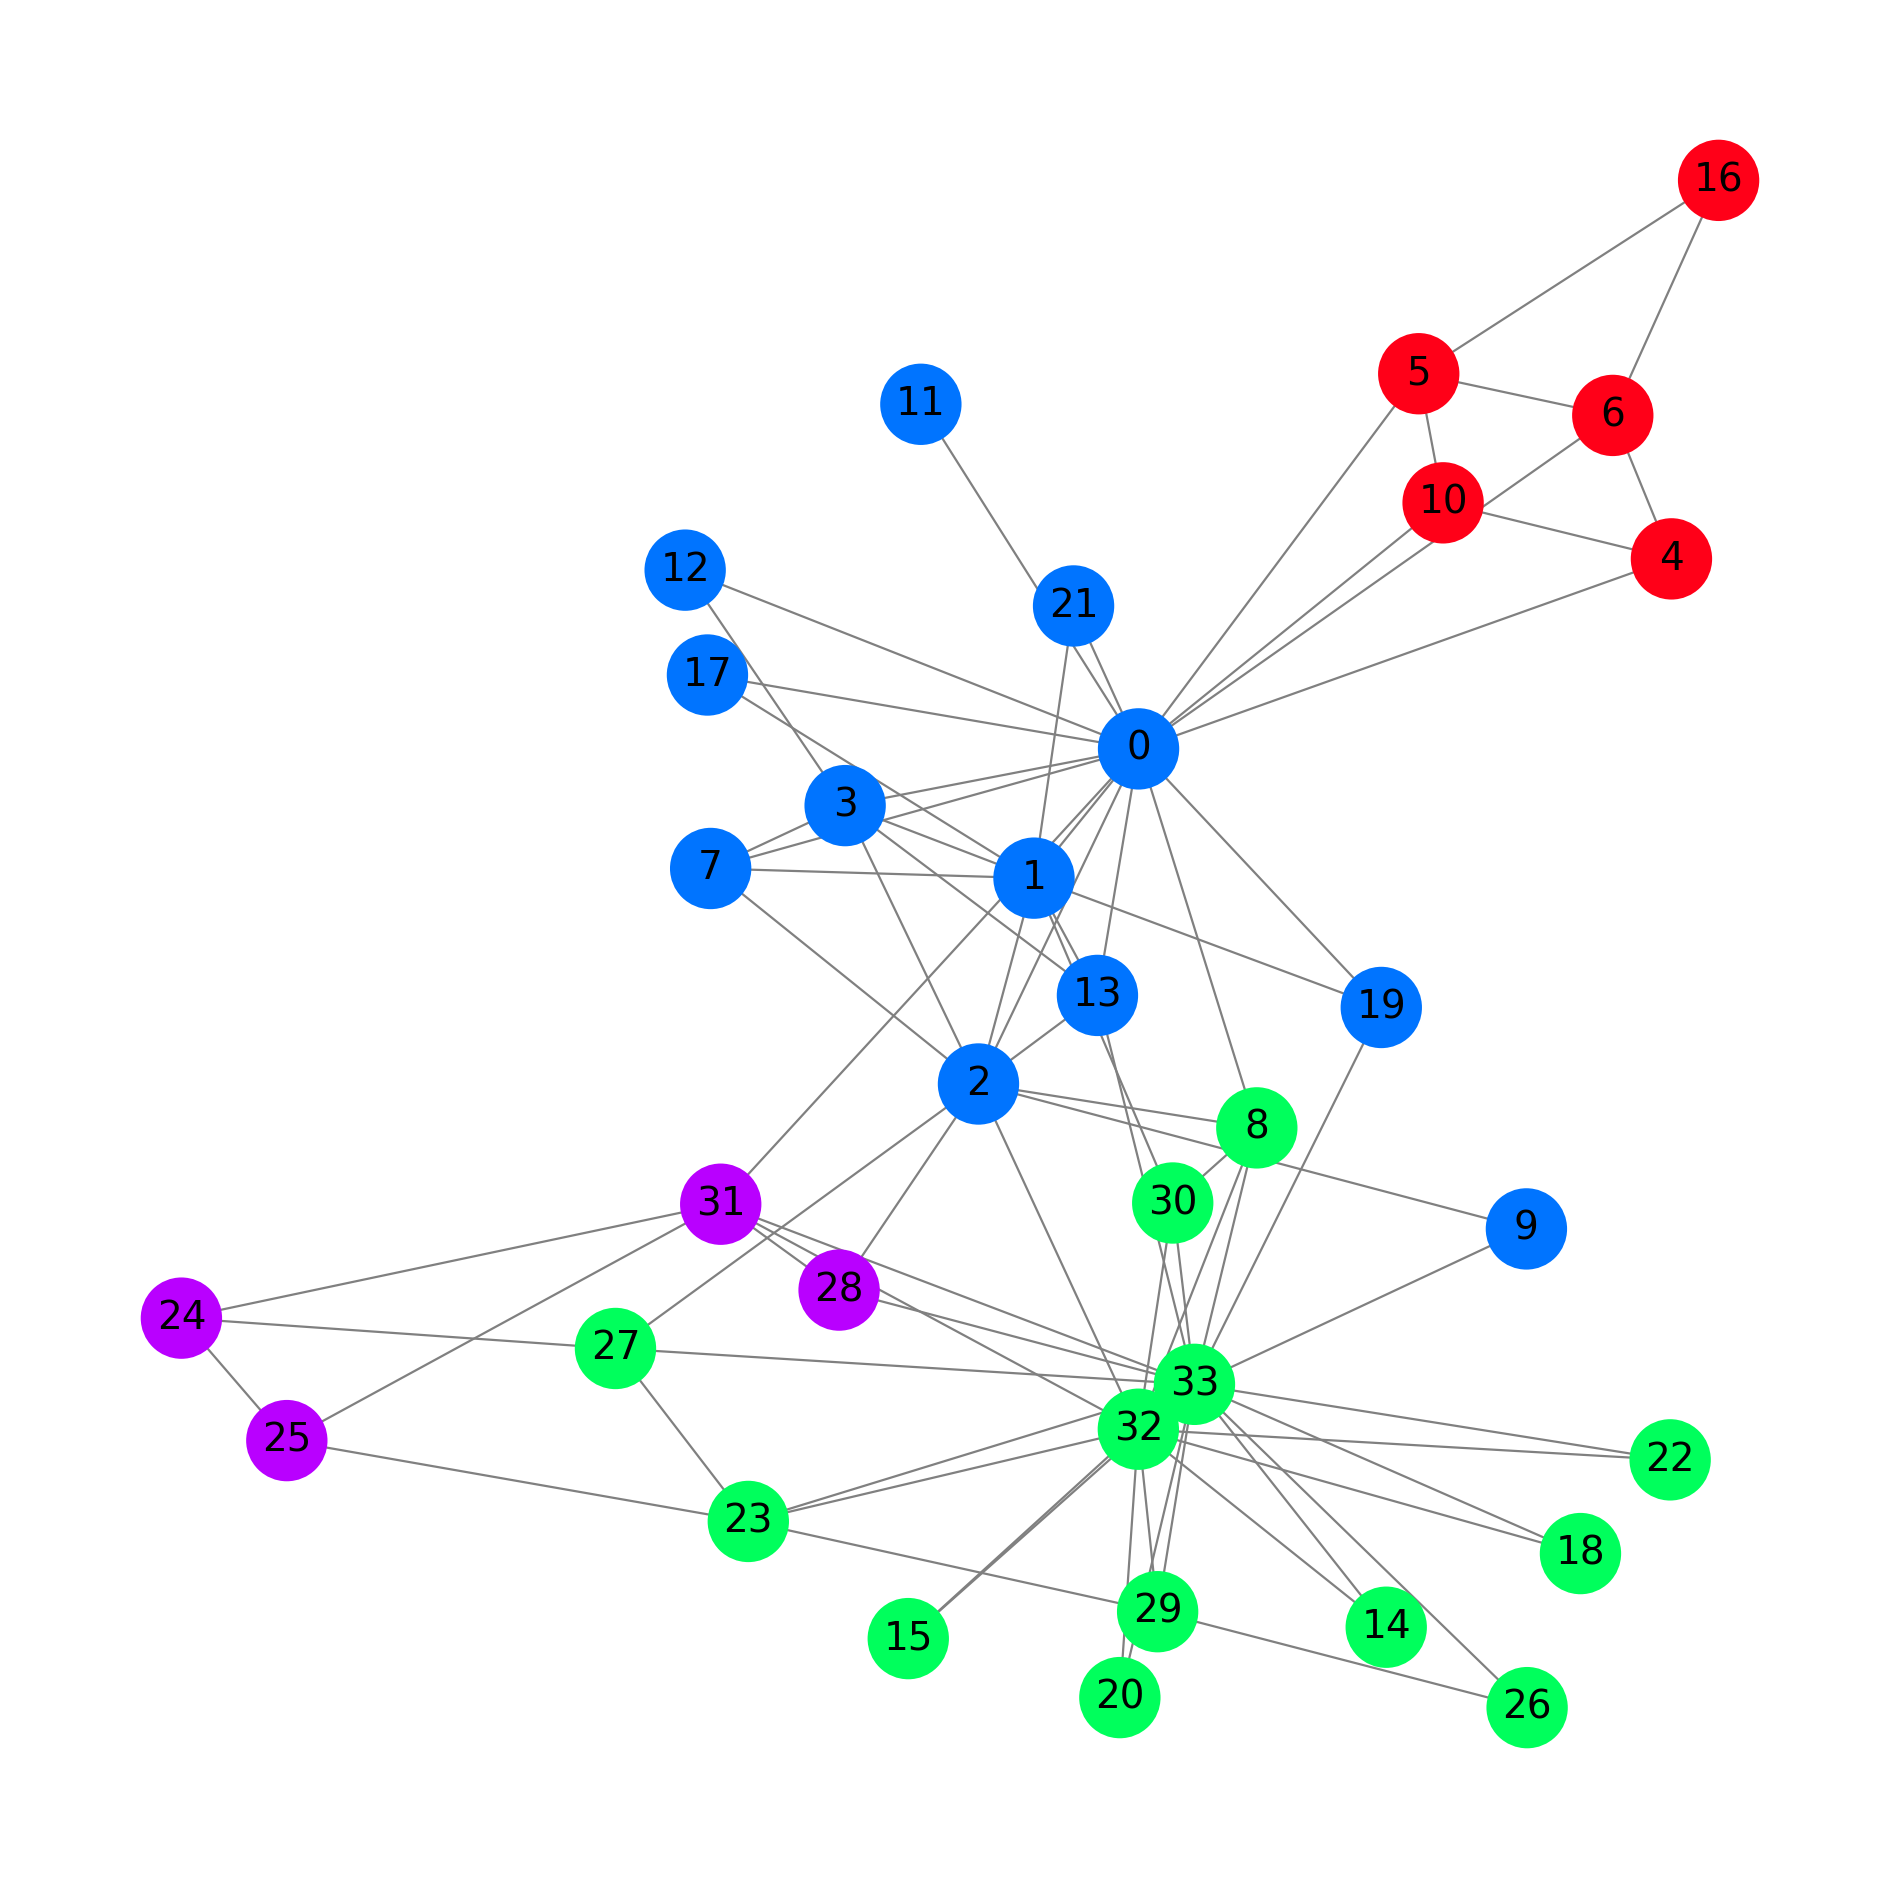

In [ ]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [ ]:
# @title
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

dataset = KarateClub()
data = dataset[0]

# Initialize the model
model = GCN(dataset.num_features, 16, dataset.num_classes)

In [ ]:
# a very simple example
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z
model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)
# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []
# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()
    # Forward pass
    h, z = model(data.x, data.edge_index)
    # Calculate loss function
    loss = criterion(z, data.y)
    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)
    # Compute gradients
    loss.backward()
    # Tune parameters
    optimizer.step()
    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.50 | Acc: 14.71%
Epoch  10 | Loss: 1.42 | Acc: 14.71%
Epoch  20 | Loss: 1.36 | Acc: 17.65%
Epoch  30 | Loss: 1.28 | Acc: 52.94%
Epoch  40 | Loss: 1.17 | Acc: 67.65%
Epoch  50 | Loss: 1.03 | Acc: 73.53%
Epoch  60 | Loss: 0.90 | Acc: 73.53%
Epoch  70 | Loss: 0.78 | Acc: 73.53%
Epoch  80 | Loss: 0.69 | Acc: 73.53%
Epoch  90 | Loss: 0.62 | Acc: 73.53%
Epoch 100 | Loss: 0.54 | Acc: 73.53%
Epoch 110 | Loss: 0.45 | Acc: 73.53%
Epoch 120 | Loss: 0.35 | Acc: 79.41%
Epoch 130 | Loss: 0.27 | Acc: 100.00%
Epoch 140 | Loss: 0.19 | Acc: 100.00%
Epoch 150 | Loss: 0.14 | Acc: 100.00%
Epoch 160 | Loss: 0.11 | Acc: 100.00%
Epoch 170 | Loss: 0.08 | Acc: 100.00%
Epoch 180 | Loss: 0.07 | Acc: 100.00%
Epoch 190 | Loss: 0.06 | Acc: 100.00%
Epoch 200 | Loss: 0.05 | Acc: 100.00%


In [ ]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 4000

In [ ]:
def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=600,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)
fig = plt.figure(figsize=(10,10),dpi=200)
plt.axis('off')
anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10),interval=500, repeat=True)
anim.save('GNN.gif', writer='pillow', fps=20)
html = anim.to_html5_video()

# Add a scale factor to the video using a div and CSS
scaled_html = f"""
<div style="transform: scale(0.25); transform-origin: 0 0;">
{html}
</div>
"""

HTML(html)

#### Example ChebNet

In [ ]:
# Assume the Karate Club dataset is available
dataset = KarateClub()
data = dataset[0]

class ChebNet(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes, K):
        super(ChebNet, self).__init__()
        self.conv1 = ChebConv(num_node_features, hidden_channels, K)
        self.conv2 = ChebConv(hidden_channels, num_classes, K)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)  # First Chebyshev convolutional layer
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)  # Second Chebyshev convolutional layer

        return F.log_softmax(x, dim=1)

# Initialize the model
model = ChebNet(dataset.num_features, 16, dataset.num_classes, K=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss:.4f}')


Epoch: 0, Loss: 1.6096
Epoch: 10, Loss: 0.7871
Epoch: 20, Loss: 0.3551
Epoch: 30, Loss: 0.1432
Epoch: 40, Loss: 0.0193
Epoch: 50, Loss: 0.0147
Epoch: 60, Loss: 0.0279
Epoch: 70, Loss: 0.0043
Epoch: 80, Loss: 0.0661
Epoch: 90, Loss: 0.0121
Epoch: 100, Loss: 0.0857
Epoch: 110, Loss: 0.0106
Epoch: 120, Loss: 0.0008
Epoch: 130, Loss: 0.0162
Epoch: 140, Loss: 0.0017
Epoch: 150, Loss: 0.0004
Epoch: 160, Loss: 0.0067
Epoch: 170, Loss: 0.0005
Epoch: 180, Loss: 0.0039
Epoch: 190, Loss: 0.0036


#### Example Application with the Planetoid Data

In [ ]:
# Load a sample graph dataset (Cora citation network)
dataset = Planetoid(root='Cora', name='Cora')
data = dataset[0]

# Define a simple GCN model
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

# Create the model, optimizer, and loss function
model = GCN(dataset.num_node_features, 16, dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

Processing...
Done!


In [ ]:
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index)
    _, pred = out.max(dim=1)
    correct = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item()
    acc = correct / data.test_mask.sum().item()
    print(f'Test Accuracy: {acc:.4f}')

Test Accuracy: 0.7840
